# Лабораторная работа 222: Изучение колебаний с помощью LC-цепочки

In [ ]:
import numpy as np
import matplotlib.pyplot as polt
import pandas as pd

from matplotlib.ticker import AutoMinorLocator, MultipleLocator

from typing import Any

from lorentzian import ApproximateResonanceCurve

In [ ]:
LC_sqrt = 8.37 * 10**(-6)

nu_0 = 1 / (np.pi * LC_sqrt)
nu_0

38029.854980142256

## Исследование бегущей волны
(картинки .jpg тут по приколу)

![image](./pictures/TEK0000.jpg)

In [ ]:
frequencies = np.array([4, 8, 12, 16, 20, 24, 28, 32, 36, 38]) * 10**3

Oy_intersection_dist = np.array([4.5,    # TEK0001
                                 8.5,    # TEK0002
                                 11.5,   # TEK0003
                                 11.5,   # TEK0004
                                 9,      # TEK0005
                                 12.5,   # TEK0006
                                 13,     # TEK0007
                                 13,     # TEK0008
                                 8.5,    # TEK0009
                                 3       # TEK0010
                                 ])

peak_distance = np.array([11.5,   # TEK0001
                          11.5,   # TEK0002
                          11.55,  # TEK0003
                          11.5,   # TEK0004
                          12.5,   # TEK0005
                          13,     # TEK0006
                          13,     # TEK0007
                          13.5,   # TEK0008
                          14,     # TEK0009
                          15      # TEK0010
                          ])

# индексы развернутых эллипсов
ellipse_reversal_indexes: list[int] = [3, 4, 6, 7, 8, 9]

# те, которые развернулись, вычитаем из pi
phase_shift = []
for i in range(len(peak_distance)):
  if i in ellipse_reversal_indexes:
    phase_shift.append(np.pi - np.arcsin(Oy_intersection_dist[i] / peak_distance[i]))
  else:
    phase_shift.append(np.arcsin(Oy_intersection_dist[i] / peak_distance[i]))

  # так как первые 5 смотрели между 1 и 3 клеммами, делим на 2
  if i < 5:
    phase_shift[i] /= 2

print("Разности частот в градусах:")
print(np.rad2deg(np.array(phase_shift)))

print("\nОценка скорости волны:")
print(2 * np.mean((phase_shift / frequencies / np.pi)**-1), "яч/с")
# 2* - подгоняний

Разности частот в градусах:
[ 11.51784205  23.82869727  42.33339652  45.          66.97275978
  74.05763139  90.         105.64247101 142.61680158 168.46304097]

Оценка скорости волны:
109323.01654010254 яч/с


### Теоретическая формула

$ \phi = 2 \arcsin(\frac{f}{\nu_0})$

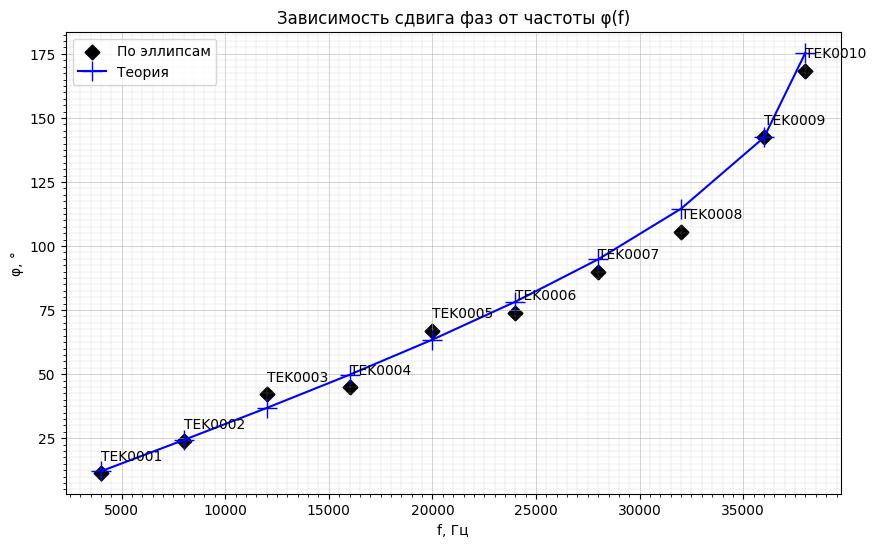

In [ ]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Зависимость сдвига фаз от частоты φ(f)")
axs.set_xlabel("f, Гц")
axs.set_ylabel("φ, °")

axs.scatter(frequencies,
            np.rad2deg(phase_shift),
            s=50,
            linewidths=1.5,
            marker="D",
            color="black",
            label="По эллипсам")

# подписи по картинкам
for i, (x, y) in enumerate(zip(frequencies, np.rad2deg(phase_shift))):
  signature: str = f"TEK000{i + 1}" if i + 1 < 10 else f"TEK00{i + 1}"
  axs.text(x, y + 5, signature)

# теория
axs.plot(frequencies,
         2 * np.rad2deg(np.arcsin(frequencies / nu_0)),
         marker="+",
         markersize=15,
         color="blue",
         label="Теория")

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

![image](./pictures/TEK0002.jpg)

![image](https://hubstub.ru/uploads/posts/2015-01/1421328252_2ae12b3ed649d6089050c56bde9d450d.jpg)

![image](https://hubstub.ru/uploads/posts/2015-01/1421328306_formula.jpg)

## Исследование резонансов

### Теоретические формулы

$Z_k = \infty \implies \omega_m = \frac{2}{\sqrt{L C}} \sin(\frac{m \pi}{2 N})$

$Z_k = 0 \implies \omega_m = \frac{2}{\sqrt{L C}} \sin(\frac{\pi}{4 N} + \frac{m \pi}{2 N})$

In [ ]:
circuit_voltage_distribution: dict[str, list[int]] = {
    "inf": [528, 496, 424, 304, 160, 24, 184, 328, 424, 528],
    "zero": [560, 552, 536, 504, 456, 400, 328, 256, 184, 0]
}

resonances: dict[str, Any] = {
    "inf": np.array([5.7, 11.5, 17, 22, 26.4, 30.2, 33.4, 35.7, 37.8]) * 10**3,
    "zero": np.array([2.9, 8.6, 14.2, 19.6, 24.3, 28.5, 31.9, 34.8, 36.8]) * 10**3
}

N = 10

### При $ Z_k = \infty $

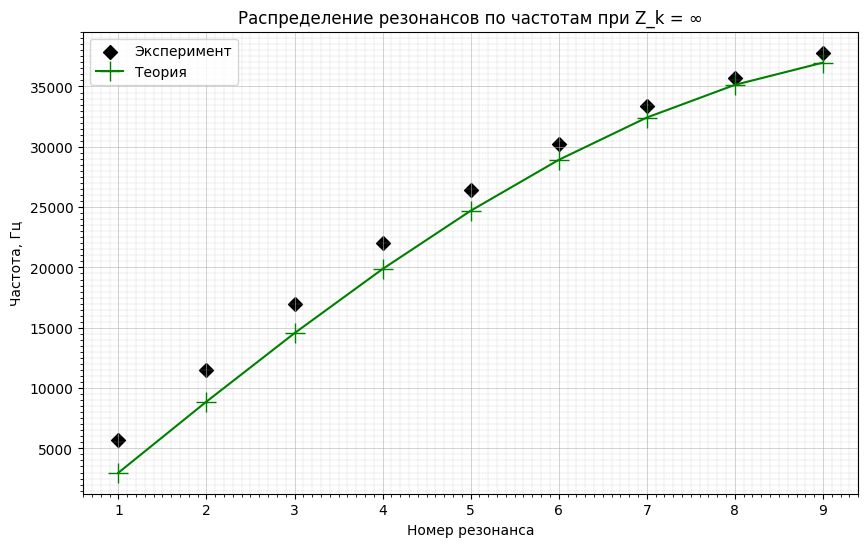

In [ ]:
x_points = np.arange(1, 9 + 1)

_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Распределение резонансов по частотам при Z_k = ∞")
axs.set_xlabel("Номер резонанса")
axs.set_ylabel("Частота, Гц")

axs.scatter(x_points,
            resonances["inf"],
            s=50,
            marker="D",
            label="Эксперимент",
            color="black")

# теория
axs.plot(x_points,
         # только нечетные (подгоняний)
         (2 / LC_sqrt) * np.sin(((2 * x_points - 1) * np.pi) / (2 * 2 * N)) / (2 * np.pi),
         # (2/LC_sqrt) * np.sin(((x_points) * np.pi)/(2*N)) / (2 * np.pi),
         marker="+",
         markersize=15,
         label="Теория",
         color="green")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

### Девятый резонанс:

![image](./pictures/TEK0011.JPG)

### Распределение по цепочке

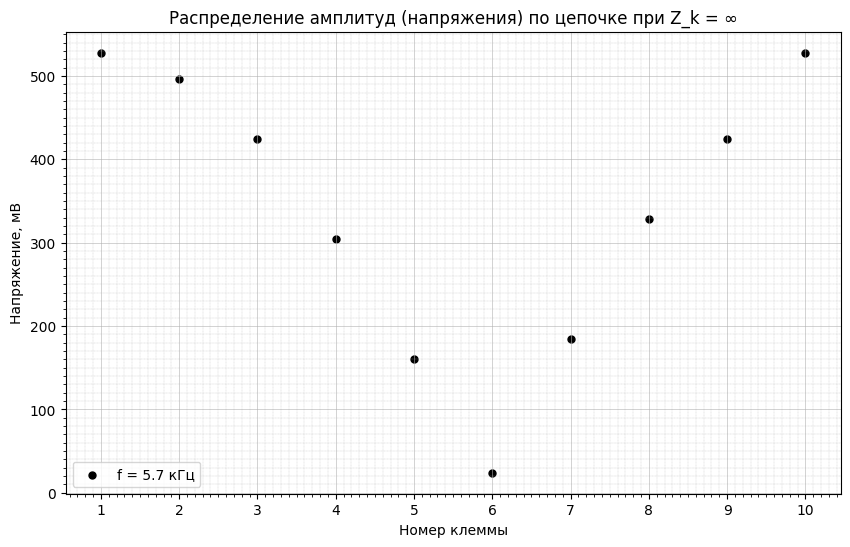

In [ ]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Распределение амплитуд (напряжения) по цепочке при Z_k = ∞")
axs.set_xlabel("Номер клеммы")
axs.set_ylabel("Напряжение, мВ")

axs.scatter(range(1, 10 + 1),
            circuit_voltage_distribution["inf"],
            marker="o",
            s=25,
            label="f = 5.7 кГц",
            color="black")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

#### 1 клемма:

![image](./pictures/TEK0012.JPG)

#### 9 клемма:

![image](./pictures/TEK0013.JPG)

#### Резонансная кривая при 1 резонансе на первой клемме

Оценка ширины резонанса: 1398.3965766270335
Оценка добротности: 6.333333333333333


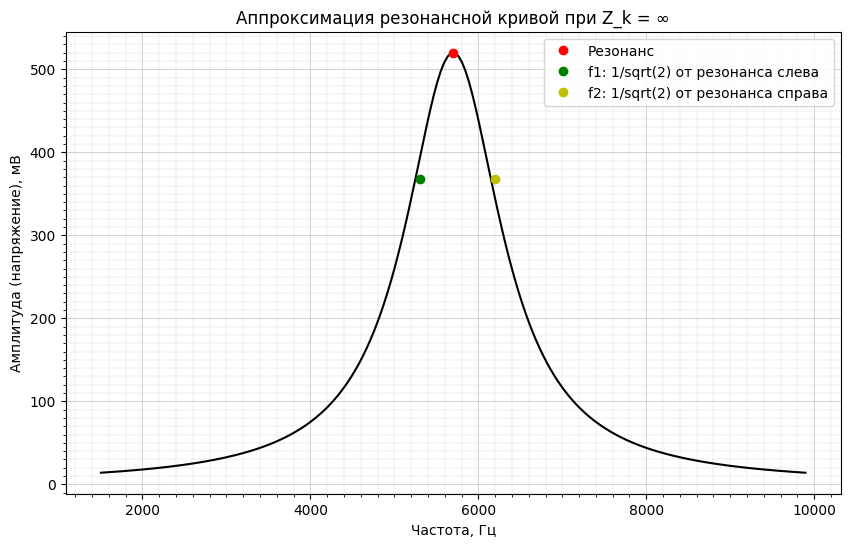

In [ ]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Аппроксимация резонансной кривой при Z_k = ∞")
axs.set_xlabel("Частота, Гц")
axs.set_ylabel("Амплитуда (напряжение), мВ")

f_0 = 5.7 * 10**3  # резонансная частота
f_1 = 5.3 * 10**3  # частота слева, где амплитуда 1/sqrt(2)
f_2 = 6.2 * 10**3  # частота справа, где амплитуда 1/sqrt(2)
resonance = 520

ResonanceCurve, gamma = ApproximateResonanceCurve(f_0, f_1, f_2, resonance)

print(f"Оценка ширины резонанса: {gamma}")
print(f"Оценка добротности: {f_0 / (f_2 - f_1)}")

frequencies = np.linspace(f_0 - 3 * gamma, f_0 + 3 * gamma, 200)
amplitudes = [ResonanceCurve(f) for f in frequencies]
polt.plot(frequencies, amplitudes, color="black")

polt.plot(f_0, resonance, 'ro', label='Резонанс')
polt.plot(f_1, resonance / np.sqrt(2), 'go', label='f1: 1/sqrt(2) от резонанса слева')
polt.plot(f_2, resonance / np.sqrt(2), 'yo', label='f2: 1/sqrt(2) от резонанса справа')

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

### При $ Z_k = 0 $

$Z_k = 0 \implies \omega_m = \frac{2}{\sqrt{L C}} \sin(\frac{\pi}{4 N} + \frac{m \pi}{2 N})$

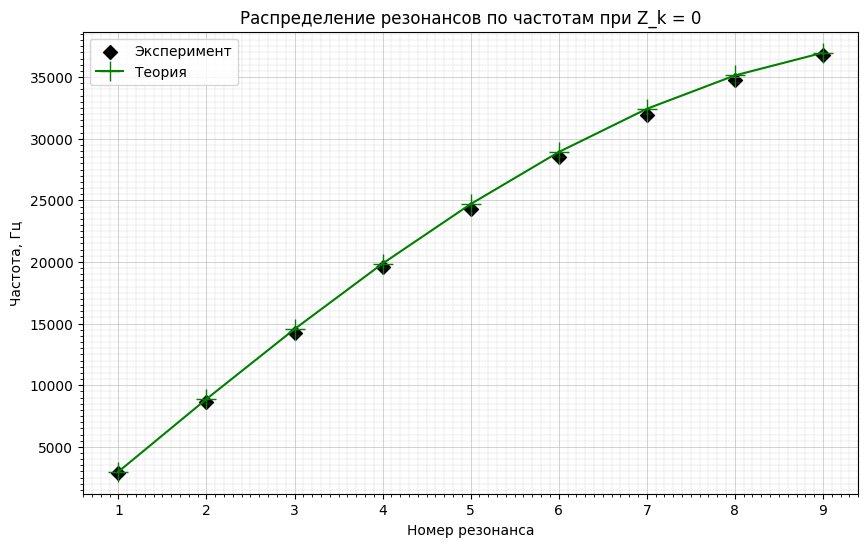

In [ ]:
x_points = np.arange(1, 9 + 1)

_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Распределение резонансов по частотам при Z_k = 0")
axs.set_xlabel("Номер резонанса")
axs.set_ylabel("Частота, Гц")

axs.scatter(x_points,
            resonances["zero"],
            s=50,
            marker="D",
            label="Эксперимент",
            color="black")

# теория
axs.plot(x_points,
         # только нечетные (подгоняний), причем по старой формуле
         (2 / LC_sqrt) * np.sin(((2 * x_points - 1) * np.pi) / (2 * 2 * N)) / (2 * np.pi),
         # (2/LC_sqrt) * np.sin((x_points * np.pi)/(2*N) + np.pi/(4*N)) / (2 * np.pi),
         marker="+",
         markersize=15,
         label="Теория",
         color="green")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

#### Распределение по цепочке

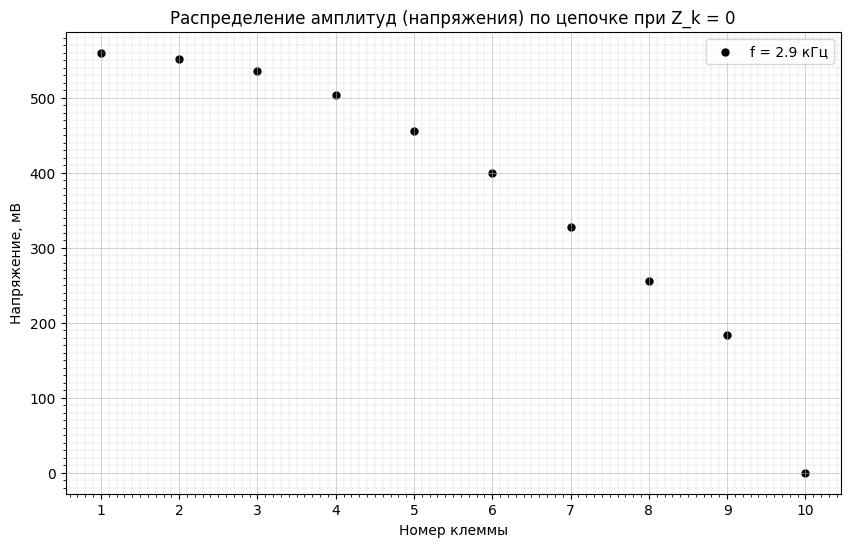

In [ ]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Распределение амплитуд (напряжения) по цепочке при Z_k = 0")
axs.set_xlabel("Номер клеммы")
axs.set_ylabel("Напряжение, мВ")

axs.scatter(range(1, 10 + 1),
            circuit_voltage_distribution["zero"],
            marker="o",
            s=25,
            label="f = 2.9 кГц",
            color="black")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

#### Резонансная кривая при 1 резонансе на первой клемме

Оценка ширины резонанса: 1336.245617665832
Оценка добротности: 3.372093023255814


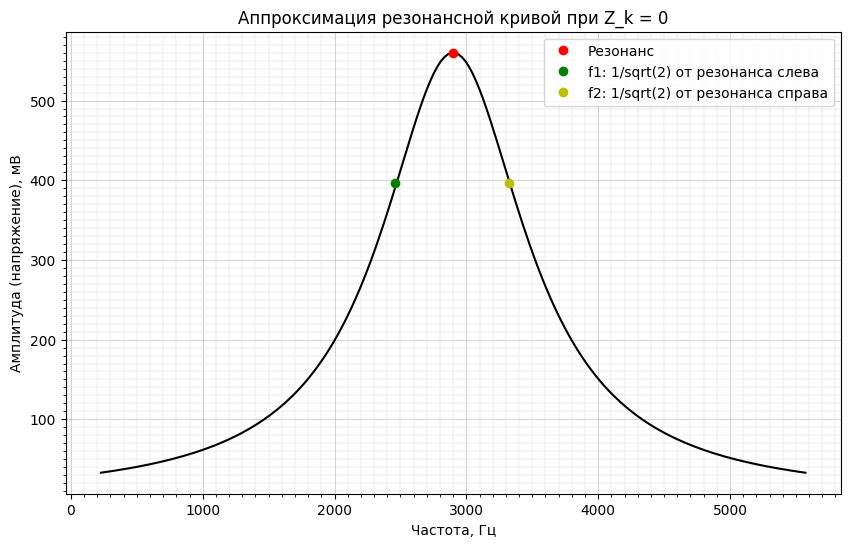

In [ ]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Аппроксимация резонансной кривой при Z_k = 0")
axs.set_xlabel("Частота, Гц")
axs.set_ylabel("Амплитуда (напряжение), мВ")

f_0 = 2.9 * 10**3   # резонансная частота
f_1 = 2.46 * 10**3  # частота слева, где амплитуда 1/sqrt(2)
f_2 = 3.32 * 10**3  # частота справа, где амплитуда 1/sqrt(2)
resonance = 560

ResonanceCurve, gamma = ApproximateResonanceCurve(f_0, f_1, f_2, resonance)

print(f"Оценка ширины резонанса: {gamma}")
print(f"Оценка добротности: {f_0 / (f_2 - f_1)}")

frequencies = np.linspace(f_0 - 2 * gamma, f_0 + 2 * gamma, 200)
amplitudes = [ResonanceCurve(f) for f in frequencies]
axs.plot(frequencies, amplitudes, color="black")

axs.plot(f_0, resonance, 'ro', label='Резонанс')
axs.plot(f_1, resonance / np.sqrt(2), 'go', label='f1: 1/sqrt(2) от резонанса слева')
axs.plot(f_2, resonance / np.sqrt(2), 'yo', label='f2: 1/sqrt(2) от резонанса справа')

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

![image](./pictures/TEK0014.JPG)

## Исследование запредельных колебаний

$\omega = \omega_0 \operatorname{ch}(\frac{\psi}{2})$

$ \psi = 2 \operatorname{arcch}(\frac{\omega}{\omega_0})$

In [ ]:
extreme_frequency: float = 39 * 10**3
extreme_frequency_voltage = np.array([600, 360, 208, 124, 70, 39, 22.4, 13.6, 8, 0]) * 10**(-3)

extreme_fluctuations: dict[str, Any] = {
    "voltage": np.array([44, 37, 16.8, 9.6, 10.4, 8, 6.4, 4.8, 3.2]),
    "frequency": np.arange(36, 44 + 1)  # * 10**3
}

data = []
for i in range(len(extreme_fluctuations["frequency"])):
  frequency = extreme_fluctuations["frequency"][i]
  voltage = extreme_fluctuations["voltage"][i]

  if frequency * 10**3 > extreme_frequency:
    psi = 2 * np.arccosh((frequency * 10**3) / extreme_frequency)
    data.append({"f, кГц": frequency, "U, мВ": voltage, "ψ": psi})

print("Декременты затухания по формулам выше:")
pd.DataFrame(data)

Декременты затухания по формулам выше:


,"f, кГц","U, мВ",ψ
0,40,10.4,0.451949
1,41,8.0,0.637806
2,42,6.4,0.779521
3,43,4.8,0.898253
4,44,3.2,1.002220


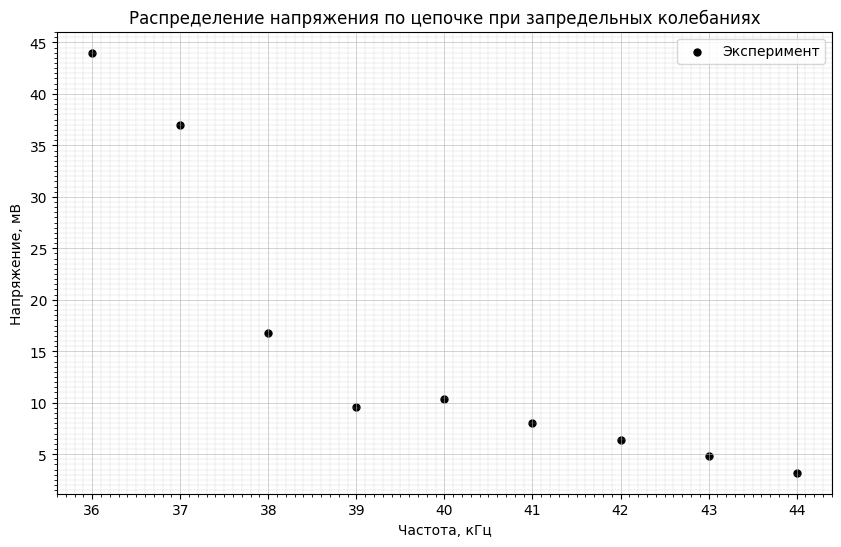

In [26]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Распределение напряжения по цепочке при запредельных колебаниях")
axs.set_xlabel("Частота, кГц")
axs.set_ylabel("Напряжение, мВ")

axs.scatter(extreme_fluctuations["frequency"],
            extreme_fluctuations["voltage"],
            marker="o",
            s=25,
            label="Эксперимент",
            color="black")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

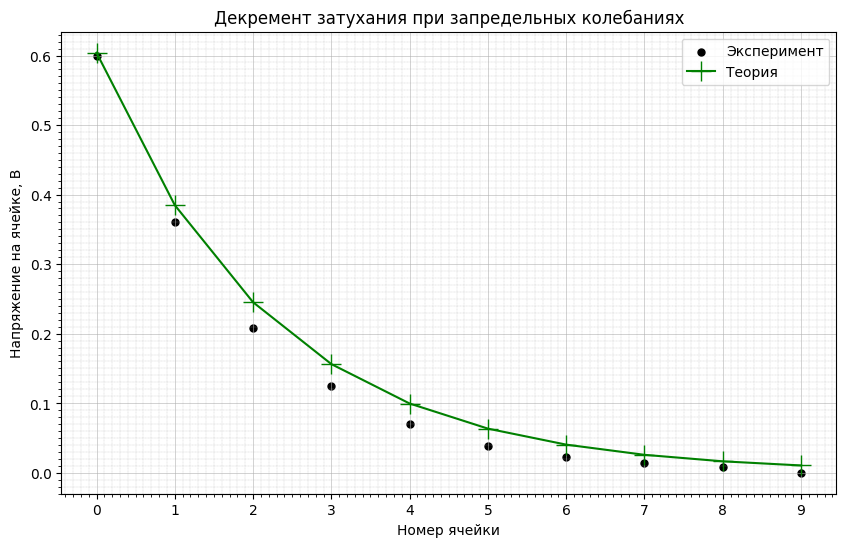

In [ ]:
x_points = np.arange(0, 9 + 1)

_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Декремент затухания при запредельных колебаниях")
axs.set_xlabel("Номер ячейки")
axs.set_ylabel("Напряжение на ячейке, В")

axs.scatter(x_points,
            extreme_frequency_voltage,
            marker="o",
            s=25,
            label="Эксперимент",
            color="black")

axs.plot(x_points,
         0.604 * np.exp(x_points * (-2 * np.acosh(extreme_frequency / nu_0))),
         marker="+",
         markersize=15,
         label="Теория",
         color="green")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()